In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import sympy as sym

In [2]:
def T(x,y,p):
    
    # Coefficients matrix
    a = np.zeros((2,2))
    a[0,0] =  p[0]
    a[1,0] =  p[1]
    a[0,1] =  p[2]
    a[1,1] =  p[3]
    
    t = 0.
    
    for i in range(2):
        for j in range(2):
            t += a[i,j]*x**i*y**j
            
    return t

In [3]:
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)
a = np.array([1,2,3,4])
T(x,y,a)

4.0*x*y + 2.0*x + 3.0*y + 1.0

In [4]:
position = np.zeros((4,2))
position[0] = [+1,+1]
position[1] = [-1,+1]
position[2] = [-1,-1]
position[3] = [+1,-1]
position

array([[ 1.,  1.],
       [-1.,  1.],
       [-1., -1.],
       [ 1., -1.]])

In [5]:
def GetCoeficientes(Tb,r):
    
    M = np.ones((4,4))
    
    for i in range(4):
        M[i,:] = [ 1. , r[i][0], r[i][1], r[i][0]*r[i][1] ] 
    
    a = np.linalg.solve(M,Tb)
    
    return a

In [6]:
Temperatura = np.array([1,2,0.5,0.3])
a = GetCoeficientes(Temperatura,position)
a

array([ 0.95, -0.3 ,  0.55, -0.2 ])

In [7]:
# Queremos la intensidad en el origen
T(0,0.5,a)

1.225

In [8]:
#for i in range(4):
#    print(T(position[i][0],position[i][1],a))

In [9]:
Resolution = 100
x = np.linspace(-1,1,Resolution)
y = np.linspace(-1,1,Resolution)
X,Y = np.meshgrid(x,y)
TempMap = T(X,Y,a)

#IntensityMap = np.zeros((Resolution,Resolution))

#for i, _x in enumerate(x):
#    for j, _y in enumerate(y):
#        IntMap[i,j] = f(_x,_y,a)

<IPython.core.display.Javascript object>


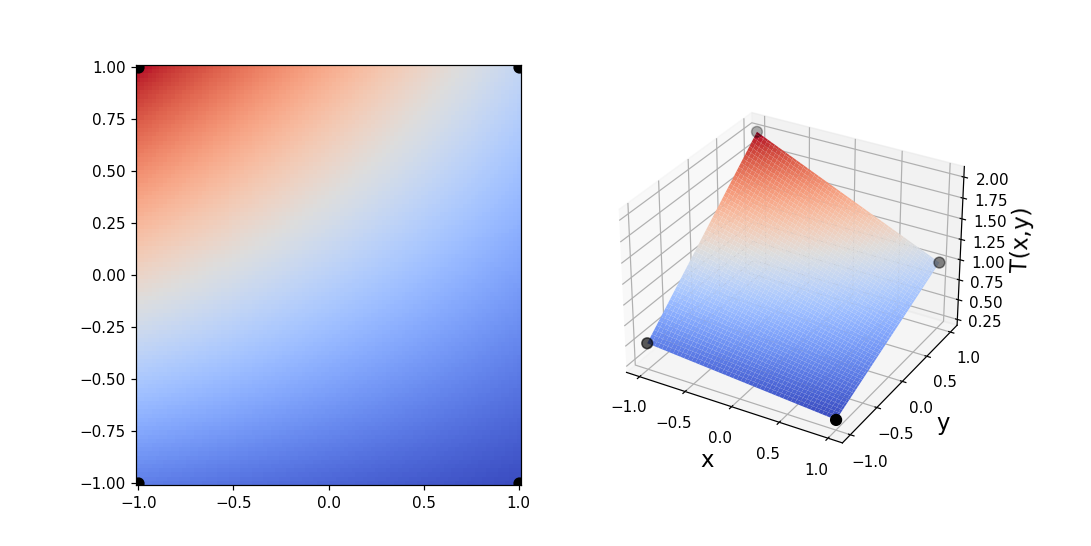

Text(0.5, 0, 'T(x,y)')

In [10]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122,projection='3d')

ax.pcolormesh(X,Y,TempMap,cmap=plt.cm.coolwarm)  
ax.scatter(position[:,0],position[:,1],marker='o',color='k',s=50)

ax1.plot_surface(X,Y,TempMap,cmap=plt.cm.coolwarm)
ax1.scatter(position[:,0],position[:,1],Temperatura,marker='o',color='k',s=50)
ax1.set_xlabel('x',fontsize=15)
ax1.set_ylabel('y',fontsize=15)
ax1.set_zlabel('T(x,y)',fontsize=15)
#plt.savefig('TemperatureMap2D.pdf')

In [11]:
def GetRotation(theta,r):
    
    RotationM = np.array( [  [np.cos(theta),-np.sin(theta)], [np.sin(theta),np.cos(theta)]  ] )
   
    New_r = np.zeros_like(r)
    
    for i in range(4):
        New_r[i] = np.dot(RotationM,r[i])
        
    return New_r

In [12]:
rp = GetRotation(4.*np.pi/2,position)

In [13]:
rp

array([[ 1.,  1.],
       [-1.,  1.],
       [-1., -1.],
       [ 1., -1.]])

In [14]:
theta = np.linspace(0,2*np.pi,200)
deg = np.rad2deg(theta)

TempVec = np.array([])

for i in range(len(theta)):
    
    rtheta = GetRotation(theta[i],position)
    
    # Calculamos interpolacion para los nuevas posiciones
    a = GetCoeficientes(Temperatura,rtheta)
    
    #print(deg[i],T(0.,0.5,a))
    
    TempVec = np.append(TempVec,T(0.,0.5,a))
    
    #plt.scatter(rp[:,0],rp[:,1],marker='.')


In [15]:
ii = np.where(TempVec == np.amin(TempVec))
minimum =  np.min(TempVec)
print(np.min(TempVec),deg[ii][0])

0.6367664129532491 151.95979899497488


<IPython.core.display.Javascript object>


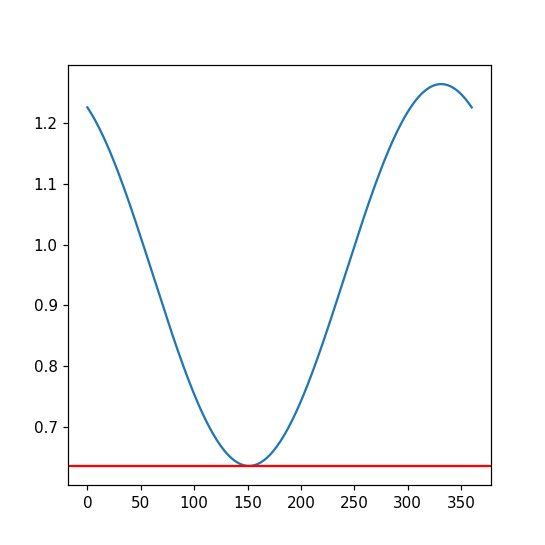

In [16]:
fig1 = plt.figure(figsize=(5,5))
plt.plot(deg,TempVec)
plt.axhline(y=minimum, color='r')